# Конспект

### Гистограмма частот

<AxesSubplot:>

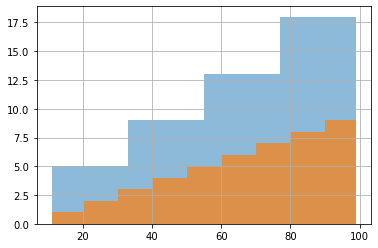

In [4]:
import pandas as pd

data = pd.Series([11, 20, 22, 31, 32, 33, 41, 42, 43, 44, 51, 52, 53, 54, 55, 61, 62, 63, 64, 65, 66, 71, 72, 73, 74, 75, 76, 77, 81, 82, 83, 84, 85, 86, 87, 88, 91, 92, 93, 94, 95, 96, 97, 98, 99])

data.hist(bins=4, alpha=0.5)  # строим гистограмму с 4 корзинами

data.hist(
    bins=[11, 20, 30, 40, 50, 60, 70, 80, 90, 99], alpha=0.7
)  # строим гистограмму с 9 корзинами, границы которых перечислены в списке

## Обман гистограмм

<AxesSubplot:>

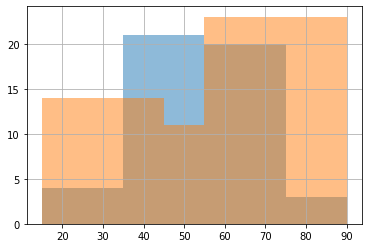

In [5]:
import pandas as pd

# назовем датасет pur_time от англ. purchase time, «время покупки»
pur_time = pd.Series([36, 44, 73, 32, 44, 29, 63, 60, 55, 74, 61, 26, 76, 40, 39, 28, 69, 61, 54, 58, 47, 41, 70, 51, 58, 36, 71, 47, 74, 59, 50, 78, 59, 48, 67, 53, 67, 52, 38, 55, 53, 53, 43, 77, 44, 63, 63, 54])

pur_time.hist(
    bins=[15, 35, 55, 75, 90], alpha=0.5
)


pur_time.hist(
    bins=[15, 45, 55, 90], alpha=0.5
)

# Статистика

## Дисперсия

Дисперсию совокупности рассчитывают методом **var()** (от англ. variance — «дисперсия»):

In [6]:
import numpy as np

x = [1, 2, 3, 4, 5, 6] # совокупность
variance = np.var(x)
print(variance)

2.9166666666666665


Если известно, что датасет — не вся совокупность, а выборка из неё, вместо дисперсии считают её оценку по имеющейся выборке (то есть s², а не σ²). Для этого в методе **var()** указывают параметр **ddof=1** :

In [8]:
import numpy as np

x = [1, 2, 3, 4, 5, 6] # выборка
variance_estimate = np.var(x, ddof=1)
print(variance_estimate)

3.5


Стандартное отклонение находят методом `std()` (от англ. standard deviation, «стандартное отклонение») из библиотеки NumPy:

In [9]:
import numpy as np

x = [1, 2, 3, 4, 5, 6]  # совокупность
standard_deviation = np.std(x)
print(standard_deviation)

1.707825127659933


In [10]:
import numpy as np

x = [1, 2, 3, 4, 5, 6] # выборка
standard_deviation = np.std(x, ddof=1)
print (standard_deviation)

1.8708286933869707


Если дисперсия известна заранее, можно применить метод `sqrt()` (от англ. square root, «квадратный корень») из библиотеки NumPy. Корень из дисперсии будет равен стандартному отклонению:

In [11]:
import numpy as np

variance = 2.9166666666666665
standard_deviation = np.sqrt(variance)
print(standard_deviation)

1.707825127659933


# Теория вероятностей

In [2]:
import numpy as np
spots = np.array([[2,3,4,5,6,7], # имя переменной spots по-английски значит «пятна»
    [3,4,5,6,7,8], 
    [4,5,6,7,8,9], 
    [5,6,7,8,9,10], 
    [6,7,8,9,10,11],
    [7,8,9,10,11,12]]) 
spot_counts = {}

for i in range(0, 6):
        for j in range(0, 6):
                if spots[i][j] not in spot_counts.keys():
                        spot_counts[spots[i][j]] = 1
                else:
                        spot_counts[spots[i][j]] += 1

print(spot_counts) 

{2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}


In [3]:
spot_probs={k:spot_counts[k]/36 for k in spot_counts}
print(spot_probs) 

{2: 0.027777777777777776, 3: 0.05555555555555555, 4: 0.08333333333333333, 5: 0.1111111111111111, 6: 0.1388888888888889, 7: 0.16666666666666666, 8: 0.1388888888888889, 9: 0.1111111111111111, 10: 0.08333333333333333, 11: 0.05555555555555555, 12: 0.027777777777777776}


<AxesSubplot:>

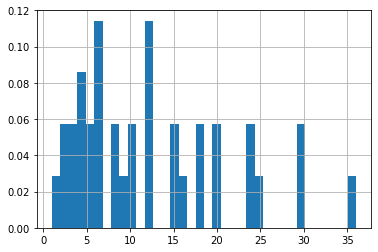

In [4]:
import pandas as pd

x = pd.Series([1, 2, 3, 4, 5, 6, 2, 4, 6, 8, 10, 12, 3, 6, 9, 12, 15, 18, 4, 8, 12, 16, 20, 24, 5, 10, 15, 20, 25, 30, 6, 12, 18, 24, 30, 36])
x.hist(density=True, bins=36) 

Аргумент *density* со значением *True* нужен для построения гистограммы плотности вероятностей. Количество корзин равно количеству значений — это значит, что по вертикальной оси будут вероятности для каждого значения.

## Математическое ожидание

In [1]:
x_probs = {
        '3': 0.1,
        '4': 0.2,
        '5' : 0.2,
        '7' : 0.3,
        '11' : 0.1,
        '16' : 0.05,
        '18': 0.05    
}
# E(X): для каждого элемента словаря вычисляем произведение вероятности и значения 
# случайной величины (целочисленное представление ключа словаря):
expectation = sum([int(x_i)*x_probs[x_i] for x_i in x_probs]) 
print(expectation)

7.000000000000001


In [2]:

x_probs = {
    '3': 0.1,
    '4': 0.2,
    '5': 0.2,
    '7': 0.3,
    '11': 0.1,
    '16': 0.05,
    '18': 0.05
}
# E(X): для каждого элемента словаря вычисляем произведение вероятности и значения
# случайной величины (целочисленное представление ключа словаря):
expectation = sum([int(x_i) * x_probs[x_i] for x_i in x_probs])
# (E(X))^2
square_of_expectation = expectation ** 2
# E(X^2)
expectation_of_squares = sum(
    [int(x_i) * int(x_i) * x_probs[x_i] for x_i in x_probs]
)
variance = expectation_of_squares - square_of_expectation
print(variance)

15.899999999999991


<BarContainer object of 6 artists>

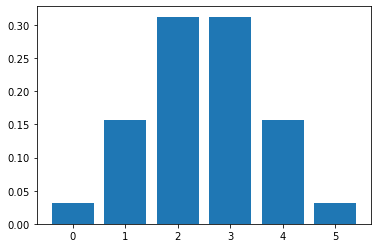

In [5]:
from matplotlib import pyplot as plt
from math import factorial

n = 5
p = 0.5

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p ** k * (1 - p) ** (n - k)
    distr.append(prob)

plt.bar(range(0, n + 1), distr)

In [9]:
from math import factorial

c = factorial(14) / (factorial(3) * factorial(11))
print(c)

364.0


<BarContainer object of 26 artists>

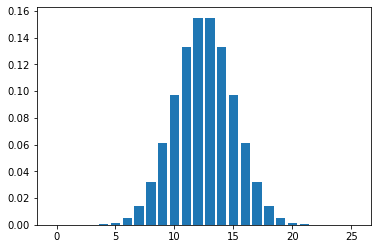

In [6]:
from matplotlib import pyplot as plt
from math import factorial

n = 25
p = 0.5

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p ** k * (1 - p) ** (n - k)
    distr.append(prob)

plt.bar(range(0, n + 1), distr)

<BarContainer object of 31 artists>

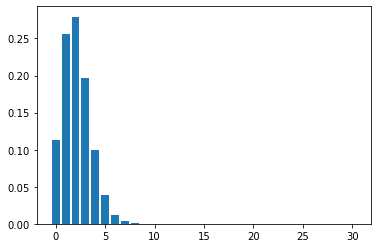

In [8]:
from matplotlib import pyplot as plt
from math import factorial

n = 30
p = 0.07

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p ** k * (1 - p) ** (n - k)
    distr.append(prob)

plt.bar(range(0, n + 1), distr)

## Нормальное распределение

In [10]:
from scipy import stats as st

# задаём нормальное распределение с математическим ожиданием 1000 
# и стандартным отклонением 100
distr = st.norm(1000, 100) 

x = 1000

result = distr.cdf(x) # считаем вероятность получить значение x 
print(result)

0.5


### найти вероятность попасть между значениями

In [11]:
from scipy import stats as st

distr = st.norm(1000, 100) 

x1 = 900
x2 = 1100

result = distr.cdf(x2) - distr.cdf(x1)
print(result)#

0.6826894921370859


### значение по вероятности

In [12]:
from scipy import stats as st

distr = st.norm(1000, 100) 

p1 = 0.841344746

result = distr.ppf(p1)
print(result)

1099.999999971673


# Калькулятор

In [3]:
p=0.75
q=1-p

In [4]:
q*q

0.0625